In [64]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.colors as mcolors
from scipy.stats import linregress
import matplotlib.pyplot as plt


In [65]:
data=pd.read_csv('/Users/smoron/Documents/1.Projects/Thermochron/Thermochron_revisions/Table_S1_revised_180420.csv', header=0)
data_table2=pd.read_csv('/Users/smoron/Documents/1.Projects/Thermochron/Thermochron_revisions/Table_2_revised_180420.csv', header=0)
data_table3=pd.read_csv('/Users/smoron/Documents/1.Projects/Thermochron/Thermochron_figs&tables_sub/Table_3.csv', header=0)
data_table4=pd.read_csv('/Users/smoron/Documents/1.Projects/Thermochron/Thermochron_figs&tables_0819/Table_4.csv', header=0)


In [70]:
samples_t2=np.unique(data_table2.Sample_N)
cmap = plt.get_cmap('nipy_spectral')
norm = mcolors.Normalize(vmin=0, vmax=(len(samples_t2))-1)

timestep=np.arange(0,len(samples_t2),1)
def get_colour(timestep):
    return cmap(norm(timestep))
c=cmap(norm(timestep))

# Plots with 2 sigma

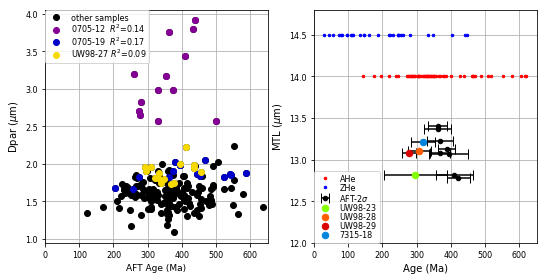

In [86]:
ms=4.5
lfs=8
lbp=0
lls=0.01
ls=8

largeDpar=['0705-12', '0705-19','UW98-27']
largeDpar_c=[c[1], c[2],c[8]]

fig= plt.subplots(2,1, figsize=(3.7*2, 3.7))# This size is in inches
plt.subplot(1, 2, 1)
plt.plot(data.Age_Ma,data.Dpar_um,  'o', c='k', label='other samples')

for i in np.arange(0,len(largeDpar),1):
    plt.plot( data.Age_Ma[data.SampleID==largeDpar[i]], data.Dpar_um[data.SampleID==largeDpar[i]],'o',c=largeDpar_c[i],
             label=str(largeDpar_l[i])+str(' $R^2$=')+str(round(scipy.stats.linregress(data.Age_Ma[data.SampleID==largeDpar[i]], data.Dpar_um[data.SampleID==largeDpar[i]])[2]**2,2)))
plt.xlim(0,650)
plt.tick_params(axis='both', which='major', labelsize=ls)
plt.grid()
plt.xlabel('AFT Age (Ma)', fontsize=9)
plt.ylabel('Dpar ($\mu$m)', fontsize=10)
plt.legend(borderaxespad=lbp, fontsize=lfs, labelspacing=lls, loc='best')

plt.subplot(1, 2, 2)
selected=['UW98-23', 'UW98-28', 'UW98-29','7315-18']
selected_c=[c[7], c[9], c[10], c[3]]

plt.plot(data_table3.Corrected_Age_Ma, np.ones(len(data_table3.Corrected_Age_Ma))*14,  'o', c='r', markersize=ms-2, label='AHe')
plt.plot(data_table4.Corrected_Age_Ma, np.ones(len(data_table4.Corrected_Age_Ma))*14.5,  'o', c='b', markersize=ms-2, label='ZHe')
plt.errorbar(data_table2.Pooled_age_Ma, data_table2.Mean_track_length_um, 
             xerr=data_table2.Pooled_age_Ma_1s*2, fmt='o',capsize=5, c='k', ms=ms, label='AFT-2$\sigma$')

for i in np.arange(0,len(selected),1):
    plt.errorbar(data_table2.Pooled_age_Ma[data_table2.Sample_N==selected[i]],
         data_table2.Mean_track_length_um[data_table2.Sample_N==selected[i]],
         fmt='o',ms=ms+2, label= selected[i], c=selected_c[i])
plt.legend(borderaxespad=lbp, fontsize=lfs, labelspacing=lls, loc='best')

plt.xlim(0,650)
plt.ylim(12,14.8)

plt.grid()
plt.tick_params(axis='both', which='major', labelsize=ls)
plt.xlabel('Age (Ma)')
plt.ylabel('MTL ($\mu$m)')

plt.tight_layout(pad=0.0)
plt.savefig("./Dpar&MTL_vs_AFT_age_2sigma.pdf", borderaxespad=lbp, fontsize=lfs, labelspacing=lls, dpi=300)

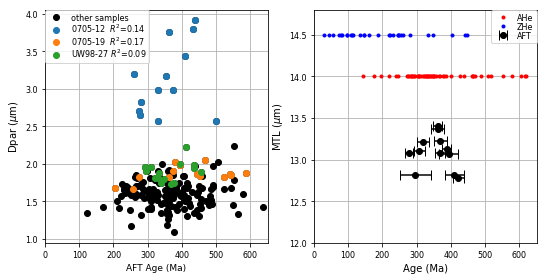

In [24]:
ms=5
lfs=8
lbp=0
lls=0.0001
ls=8

largeDpar=['0705-12', '0705-19','UW98-27']
largeDpar_l=['0705-12 ', '0705-19 ','UW98-27']

fig= plt.subplots(2,1, figsize=(3.7*2, 3.7))# This size is in inches

plt.subplot(1, 2, 1)
plt.plot(data.Age_Ma,data.Dpar_um,  'o', c='k', label='other samples')

for i in np.arange(0,len(largeDpar),1):
    plt.plot( data.Age_Ma[data.SampleID==largeDpar[i]], data.Dpar_um[data.SampleID==largeDpar[i]],'o',
             label=str(largeDpar_l[i])+str(' $R^2$=')+str(round(scipy.stats.linregress(data.Age_Ma[data.SampleID==largeDpar[i]], data.Dpar_um[data.SampleID==largeDpar[i]])[2]**2,2)))
plt.xlim(0,650)
plt.tick_params(axis='both', which='major', labelsize=ls)
plt.grid()
plt.xlabel('AFT Age (Ma)', fontsize=9)
plt.ylabel('Dpar ($\mu$m)', fontsize=10)
plt.legend(borderaxespad=lbp, fontsize=lfs, labelspacing=lls, loc='best')

plt.subplot(1, 2, 2)
#plt.plot(data_table2.Pooled_age_Ma, data_table2.Mean_track_length_um,  'o', c='k', label='other samples')
plt.errorbar(data_table2.Pooled_age_Ma, data_table2.Mean_track_length_um, 
             xerr=data_table2.Pooled_age_Ma_1s, fmt='o',capsize=5, c='k', label='AFT')
plt.plot(data_table3.Corrected_Age_Ma, np.ones(len(data_table3.Corrected_Age_Ma))*14,  'o', c='r', markersize=ms-2, label='AHe')
plt.plot(data_table4.Corrected_Age_Ma, np.ones(len(data_table4.Corrected_Age_Ma))*14.5,  'o', c='b', markersize=ms-2, label='ZHe')
plt.legend(borderaxespad=lbp, fontsize=lfs, labelspacing=lls, loc='best')

plt.xlim(0,650)
plt.ylim(12,14.8)

plt.grid()

plt.tick_params(axis='both', which='major', labelsize=ls)
plt.xlabel('Age (Ma)')
plt.ylabel('MTL ($\mu$m)')

plt.tight_layout(pad=0.0)
plt.savefig("./Fig_3Dpar&MTL_vs_AFT_age_180420.pdf", borderaxespad=lbp, fontsize=lfs, labelspacing=lls, dpi=300)

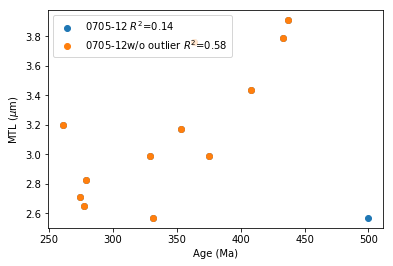

In [13]:
#Checking correlation for sample '0705-12' and
i=0
plt.plot( data.Age_Ma[data.SampleID==largeDpar[i]], data.Dpar_um[data.SampleID==largeDpar[i]],'o',
          label=str(largeDpar[i])+
          str(' $R^2$=')+
          str(round(scipy.stats.linregress(data.Age_Ma[data.SampleID==largeDpar[i]], data.Dpar_um[data.SampleID==largeDpar[i]])[2]**2,2)))
               
            
plt.plot(np.concatenate([data.iloc[75:84,12],data.iloc[85:88,12]]), 
        np.concatenate([data.iloc[75:84,10],data.iloc[85:88,10]]),'o',
        label=str('0705-12w/o outlier')+' $R^2$='+str(round(scipy.stats.linregress(np.concatenate([data.iloc[75:84,12],data.iloc[85:88,12]]),
                             np.concatenate([data.iloc[75:84,10],data.iloc[85:88,10]]))[2]**2,2)))

round(scipy.stats.linregress(np.concatenate([data.iloc[75:84,12],data.iloc[85:88,12]]),
                             np.concatenate([data.iloc[75:84,10],data.iloc[85:88,10]]))[2]**2,2)
plt.xlabel('Age (Ma)')
plt.ylabel('MTL ($\mu$m)')
plt.legend(loc='upper left')

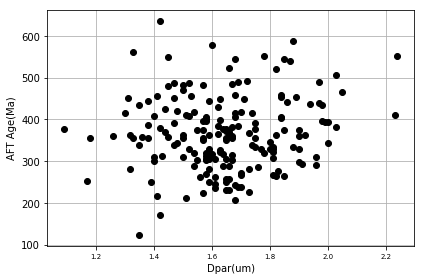

In [5]:
fig= plt.plot( figsize=(3.7, 3,7))# This size is in inches

plt.plot(data.Dpar_um[data.SampleID!='0705-12'], data.Age_Ma[data.SampleID!='0705-12'], 'o', c='k')
plt.xticks( fontsize=7)
plt.grid()
plt.ylabel('AFT Age(Ma)')
plt.xlabel('Dpar(um)')
plt.tight_layout()
#plt.savefig("./AFT_age_vs_Dpar_No0705-12.pdf")

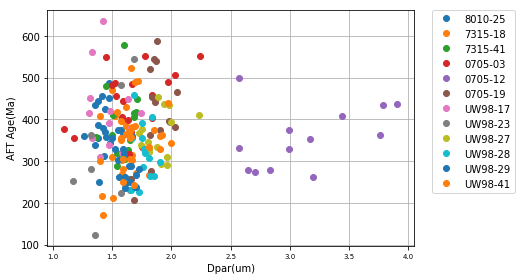

In [6]:
fig= plt.plot( figsize=(3.7, 3,7))# This size is in inches
samples=data.SampleID.unique()

for i in samples:
    plt.plot(data.Dpar_um[data.SampleID==i], data.Age_Ma[data.SampleID==i], 'o', label=i)

plt.xticks( fontsize=7)
plt.grid()
plt.ylabel('AFT Age(Ma)')
plt.xlabel('Dpar(um)')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

#plt.savefig("./AFT_age_vs_Dpar_bysample.pdf")

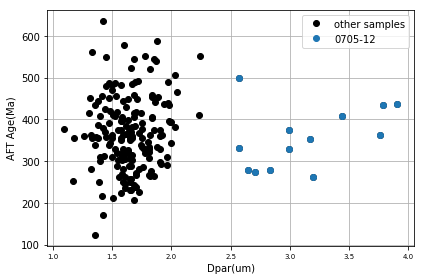

In [7]:
fig= plt.plot( figsize=(3.7, 3,7))# This size is in inches
plt.plot(data.Dpar_um, data.Age_Ma, 'o', c='k', label='other samples')

largeDpar=['0705-12']
for i in largeDpar:
    plt.plot(data.Dpar_um[data.SampleID==i], data.Age_Ma[data.SampleID==i], 'o', label=i)

plt.xticks( fontsize=7)
plt.grid()
plt.ylabel('AFT Age(Ma)')
plt.xlabel('Dpar(um)')
plt.tight_layout()
plt.legend()